Note: Look into Statistically sound associations

In [1]:
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

from itertools import islice

import pickle

In [2]:
import ARM_Config as config
from Helper_Functions import expandGroups, liftConf

with open(config.categoryGroups, 'rb') as f:
    catGroups = pickle.load(f)

In [3]:
ruleDF = pd.read_pickle(config.rules_filtered)
df = pd.read_excel(config.SourceDataPath)
total = len(df)

print('as loaded', len(ruleDF))

as loaded 81315


In [4]:
## Filtering Constants
#note that the following filters have allready been applied, possibly with different values

min_support = 750 #total_XY
min_improvement = 0.1
min_confidence = 0.4
min_lift = 1.2

targets = expandGroups(catGroups, 'cluster', '1200')
sources = expandGroups(catGroups)- targets

## Columns to display
display = ['confidence','other conf','lift', 'x', 'y', 'total X', 'total Y', 'total XY']

In [5]:
#repeat filters with new values
filteredDF = ruleDF[(ruleDF['confidence'] >= min_confidence)
                    & (ruleDF['lift'] >= min_lift)
                    & (ruleDF['x'] <=sources) & (ruleDF['y'].isin(targets))
                    & (ruleDF['total XY'] >= min_support)
                    & (ruleDF['confidence'] - ruleDF['other conf'] >min_improvement)]

print('filtered', len(filteredDF))

filteredDF.reset_index(drop=True, inplace=True)

filtered 44


In [12]:
filteredDF.sort_values(['confidence'],ascending=False)[display]

confidence  other conf      lift  \
12    0.941063    0.818395  2.800376   
31    0.884806    0.336049  2.632970   
38    0.875906    0.465127  3.299245   
29    0.834677    0.336049  2.483799   
11    0.818395    0.716283  2.435346   
30    0.807639    0.336049  2.403338   
16    0.747290    0.627733  2.223755   
23    0.743812    0.595427  2.213405   
10    0.716283    0.336049  2.131484   
32    0.701540    0.322392  7.037263   
34    0.698710    0.324671  7.008867   
41    0.686011    0.455479  2.583975   
19    0.685798    0.336049  2.040769   
18    0.659232    0.557039  1.961716   
15    0.627733    0.336049  1.867982   
25    0.624914    0.336049  1.859593   
3     0.620690    0.421147  2.861612   
20    0.595599    0.338317  1.772360   
22    0.595427    0.336049  1.771846   
42    0.587361    0.455479  2.212392   
28    0.587146    0.336049  1.747205   
33    0.586051    0.293252  5.878767   
14    0.586011    0.427360  1.743828   
40    0.584341    0.455479  2.201018   
6     0.576129    0.266726  7.883312   
1     0.573894    0.396835  2.645868   
27    0.569076    0.336049  1.693433   
36    0.558499    0.455479  2.103679   
43    0.558468    0.265487  2.103562   
17    0.557039    0.336049  1.657614   
39    0.555817    0.455479  2.093576   
26    0.529991    0.336049  1.577127   
4     0.519255    0.237104  7.105097   
0     0.511775    0.384511  2.359477   
7     0.494942    0.336049  1.472829   
24    0.492211    0.336049  1.464701   
13    0.469097    0.336049  1.395918   
37    0.465127    0.265487  1.751978   
35    0.455479    0.265487  1.715639   
9     0.452839    0.336049  1.347539   
21    0.447430    0.338317  1.331445   
8     0.445278    0.336049  1.325040   
2     0.421147    0.216902  1.941646   
5     0.400815    0.200408  5.484451   

                                                    x            y  total X  \
12          (Pressure_(9.8, 10.1], Winter, year_2015)  cluster_2.0     1035   
31                                         (month_12)  cluster_2.0     1007   
38                                (Spring, year_2015)  cluster_0.0     2208   
29                                          (month_1)  cluster_2.0     1488   
11                     (Pressure_(9.8, 10.1], Winter)  cluster_2.0     2131   
30                                         (month_11)  cluster_2.0     1440   
16  (visibility_(-1e-50, 24100.0], dew_point_(-12....  cluster_2.0     1476   
23                       (temp_(6.8, 9.9], year_2016)  cluster_2.0     1616   
10                                           (Winter)  cluster_2.0     3863   
32                (year_2016, dew_point_(12.4, 19.3])  cluster_4.0     1558   
34                     (temp_(16.8, 27.4], year_2016)  cluster_4.0     1550   
41                     (temp_(13.2, 16.8], year_2015)  cluster_0.0     1637   
19                                 (temp_(-7.2, 6.8])  cluster_2.0     3415   
18  (dew_point_(4.6, 7.3], visibility_(-1e-50, 241...  cluster_2.0     1928   
15                           (dew_point_(-12.1, 4.6])  cluster_2.0     3476   
25                  (relative_humidity_(93.0, 100.0])  cluster_2.0     2906   
3                      (temp_(16.8, 27.4], year_2015)  cluster_3.0     1798   
20  (Azimuth_(121.41000000000011, 204.964], Elevat...  cluster_2.0     1318   
22                                  (temp_(6.8, 9.9])  cluster_2.0     3411   
42                 (dew_point_(7.3, 10.0], year_2015)  cluster_0.0     1614   
28                              (cond_str_Light Rain)  cluster_2.0     1836   
33                                (Summer, year_2016)  cluster_4.0     2208   
14                      (Morning, DHI_(-1e-50, 37.0])  cluster_2.0     1587   
40                      (year_2015, temp_(9.9, 13.2])  cluster_0.0     1571   
6                      (temp_(16.8, 27.4], year_2016)        >1200     1550   
1                 (year_2015, dew_point_(12.4, 19.3])  cluster_3.0     1854   
27                                           (rain_2)  cluster_2.0    

In [10]:
#find trivial equivalences
def trivial(df):
    return df[(df['total X'] == df['total Y']) & (df['total X'] == df['total XY'])][display]

trivial(filteredDF)

Empty DataFrame
Columns: [confidence, other conf, lift, x, y, total X, total Y, total XY]
Index: []

In [8]:
def rulesFor(ruleDF, name, predictive=True, maxFound = 6):
    if predictive:
        toFind = 'x'
        fixed = 'y'
        t = '{result}\n==> {name}'
    else:
        toFind = 'y'
        fixed = 'x'
        t = '{name} ==>\n{result}'
    rules = ruleDF[ruleDF[fixed]==name].sort_values(['confidence'],ascending = False).iterrows()
    result = '\n'.join([', '.join(row[toFind]) for index,row in islice(rules, maxFound)])
    if not result:
        result = 'Nothing'
    return t.format(name=name, result=result)

year_2015, month_4
month_3, year_2015
==> cluster_0.0 

Pressure_(9.8, 10.1], year_2016
rain_0, year_2016
==> cluster_1.0 

month_12, year_2015
visibility_(-1e-50, 24100.0], Winter, DHI_(-1e-50, 37.0], year_2015, Pressure_(9.8, 10.1]
==> cluster_2.0 

Pressure_(9.8, 10.1], Summer, temp_(16.8, 27.4], year_2015
Summer, temp_(16.8, 27.4], year_2015, dew_point_(12.4, 19.3]
==> cluster_3.0 

>1200, temp_(16.8, 27.4], dew_point_(12.4, 19.3]
>1200, temp_(16.8, 27.4], visibility_(32200.000000000004, 48300.0]
==> cluster_4.0 



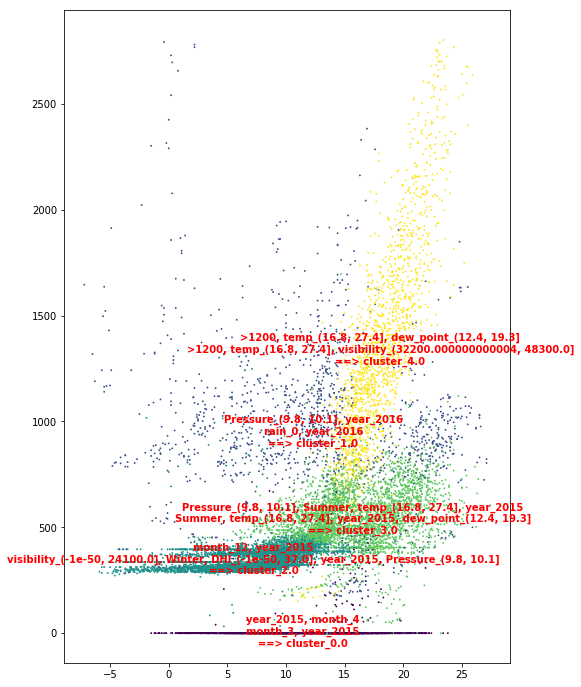

In [9]:
f = lambda clusterNum: rulesFor(ruleDF,'cluster_%s' % float(clusterNum), maxFound=2, predictive=True)

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)
ax.scatter(df['temp'], df['SumCh3Ch4'], s=.7,c=df['cluster'])

minTemp,maxTemp = ax.get_xlim()
minCh,maxCh = ax.get_ylim()

means = df.groupby('cluster').mean()
means['normCh'] = (means['SumCh3Ch4']-minCh)/(maxCh-minCh)
means['normTemp'] = (means['temp']-minTemp)/(maxTemp-minTemp)

for i in range(5):
    plt.text(
        means.loc[i,['normTemp']],#replace with 1.2 for out to the side
        #1.2,
        means.loc[i,['normCh']],
        f(i), transform=ax.transAxes,
        verticalalignment='center',
        horizontalalignment='center',
        color = 'red',weight='bold')
    print(f(i),'\n')